## <center>  **Maestría en Analítica de Datos** </center>
#### <center> Universidad Central </center>

__*Estudiante: Ronald Ricardo Ruiz Velásquez*__

### <center> **Análisis espacio temporal de los hurtos a celulares en la ciudad de Bogotá durante el periodo 2018** </center>

## **Tabla de contenido**

1. **Comprensión de los datos**
>

2. **Preparación de los Datos**
>
>>2.1 Selección de los datos
>
>>2.2 Construcción de los datos
>
3. **Modelado**
>
>>3.1 Selección técnica de modelo


### **1. Comprensión de los datos**

##### Instalación e importación de librerias

In [5]:
pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#Importación de las librerias a utilizar:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import folium
from folium import plugins
from folium.plugins import HeatMap

In [7]:
# Creación de una instancia de las variables categoricas utilizando labelEncoder
labelEncoder = LabelEncoder()

##### Cargue y lectura del conjunto de datos

In [8]:
#Lectura del conjunto de datos a utilizar
path = 'BD_HurtosOne.xlsx'
hurtos  = pd.read_excel(path)

In [ ]:
#Cargue del conjuntos de datos realizado desde la página de Kaggle www.kagle.com
hurtos  = pd.read_excel("../input/bd-hurtosb/BD_HurtosOne.xlsx")

### **Descripción de los datos general**

La información se encuentra almacenada en un conjunto de datos de un formato de Excel, con 42 variables y un total de 59048 registros, la descripción de set de datos son los siguientes:
>
| Variable      | Descripción de la variable|
| :------------- | :--------------------------------- |
| COD_JURIS_ESTACION | Código de la Estación Policial       |
| JURIS.ESTACIÓN / ÁREA| Nombre de la Estación de Policía        |
| LOCALIDAD  | Nombre de la Localidad de Bogotá       |
| COD_LOCALIDAD | Número de la Localidad de Bogotá de acuerdo a la Alcaldía Mayor|
| SIGLA_ESTACION| Sigla para la Estación de Policía de Bogotá   |
| COD_COSEC_BOGOTA | Número del Comando Operativo  COSEC (1 al 5)      |
|  COSEC_BOGOTA | Nombre de los Comandos Operativos de Seguridad Ciudadana en Bogotá|
| JURIS.CUADRANTE |Número del cuadrante donde ocurrió el hecho |
| AÑO | Año cuando se cometió el hecho|
| MES_NUM |Número del mes cuando se cometió el hecho |
| MES_LARGO| Nombre del mes cuando se cometió el hecho  |
| DIA_NUM |Número del día del mes que se cometió el hecho  |
|DIA_SEMANA  | Día de la semana que se cometió el hurto (Domingo a Lunes)|
| FECHA_COMPLETA_1 |Fecha completa con hora que se cometió el hecho  |
| HORA_HECHO | Hora del hecho en formato de hora militar (00:00 a 23:59) |
| COD_INTERVALOS_HORA | Codificación a los intervalos de hora ( 1 (00:00 – 05:59),  2 (06:00 – 11:59), 3 (12:00 – 17:59), 4 (18:00 – 23:59))  |
|INTERVALOS_HORA | Rango de intervalos de hora que se cometió el hurto (00:00 – 05:59, 06:00 – 11:59, 12:00 – 17:59, 18:00 – 23:59)  |
|COD_CAT_MODALIDAD  | Codificación mediante categoría de las modalidades de hurto a celulares (1-12)|
|CATEGORIA_MODALIDAD  | Descripción de las categorías de la modalidad utilizada en el hurto |
|COD_MOVIL_AGRESOR  | Codificación al móvil utilizado por el agresor en el hecho (1-13)|
|MOVIL_AGRESOR  |Descripción del móvil utilizado por el agresor en el hecho |
|COD_MOVIL_VICTIMA  |Codificación al móvil utilizado por el agresor en el hecho (1-13) |
| MOVIL_VICTIMA | Descripción de la manera de movilizarse de la victima al momento del hurto|
|COD_ARMAS_MEDIOS |Codificación de las armas o medios utilizados en el hurto (1-7)  |
|ARMAS_MEDIOS  |Descripción de las armas o medios utilizados en el hurto  |
|COD_ZONA  | Codificación de la zona geográfica (1 (Urbana), 2 (Rural)) |
|ZONA  |Zona geográfica donde se comente el hecho (Urbana o Rural)  |
|COD_CAT_CLASE_SITIO  |Codificación de la clase del sitio donde se realiza el hecho (1-21)  |
|CATEGORIA_CLASE_SITIO  |Descripción de la clase de sitio donde se realiza el hecho  |
|CLASE_SITIO  | Descripción mas especifica de la clase del sitio donde se comete el delito  |
|LATITUD  |Coordenada geográfica referente a la Latitud de donde se cometió el hecho |
|LONGITUD  |Coordenada geográfica referente a la Longitud de donde se cometió el hecho |
|HECHOS_ID  | Codificación a los hechos cometidos por hurto  |
|COD_MEDIO_CONOCIMIENTO  | Código a la forma de denuncia del hecho (1-4) |
|MEDIO_CONOCIMIENTO  | Descripción de la forma de denuncia realizada por el hecho |
|COD_GENERO  | Código del género (1 (Femenino), 2 (Masculino)) |
|GENERO  | Genero de la víctima por hurto |
|EDAD  |Edad que tenía la víctima por hurto  |
|COD_AGRUPA_EDAD_PERSONA  | Codigo para agrupación por edades (1(Menores), 2 (Adolescentes), 3 (Adultos) ) |
|AGRUPA_EDAD_PERSONA |Descripción de la agrupación de las victimas por rango de edades |
|CANTIDAD | Cantidad de hurtos cometidos por hecho |

In [9]:
#Visualización del conjunto de datos 
hurtos.head()

,COD_JURIS_ESTACION,JURIS.ESTACIÓN / ÁREA,LOCALIDAD,COD_LOCALIDAD,JURIS.CAI,SIGLA_ESTACION,COD_COSEC_BOGOTA,COSEC_BOGOTA,JURIS.CUADRANTE,AÑO,...,COD_MEDIO_CONOCIMIENTO,MEDIO_CONOCIMIENTO,COD_GENERO,GENERO,EDAD,COD_AGRUPA_EDAD_PERSONA,AGRUPA_EDAD_PERSONA,CANTIDAD,BARRIOS_HECHO,COD_BARRIO
0,101,ESTACION E-01 USAQUEN,USAQUEN,1,CAI CONTADOR E-1,E - 1,1,COSEC 1,MEBOGMNVCCC01E01C01000020,2018,...,1,DENUNCIA VIRTUAL,1,FEMENINO,68,3,ADULTOS,1.0,LOS CEDRITOS E-1,10001
1,101,ESTACION E-01 USAQUEN,USAQUEN,1,CAI CONTADOR E-1,E - 1,1,COSEC 1,MEBOGMNVCCC01E01C01000020,2018,...,1,DENUNCIA VIRTUAL,2,MASCULINO,42,3,ADULTOS,1.0,LOS CEDRITOS E-1,10001
2,101,ESTACION E-01 USAQUEN,USAQUEN,1,CAI CONTADOR E-1,E - 1,1,COSEC 1,MEBOGMNVCCC01E01C01000020,2018,...,1,DENUNCIA VIRTUAL,1,FEMENINO,38,3,ADULTOS,1.0,LOS CEDRITOS E-1,10001
3,101,ESTACION E-01 USAQUEN,USAQUEN,1,CAI CONTADOR E-1,E - 1,1,COSEC 1,MEBOGMNVCCC01E01C01000020,2018,...,1,DENUNCIA VIRTUAL,2,MASCULINO,25,3,ADULTOS,1.0,VILLA MAGDALA E-1,10002
4,101,ESTACION E-01 USAQUEN,USAQUEN,1,CAI CONTADOR E-1,E - 1,1,COSEC 1,MEBOGMNVCCC01E01C01000020,2018,...,1,DENUNCIA VIRTUAL,2,MASCULINO,32,3,ADULTOS,1.0,LOS CEDRITOS E-1,10001


In [10]:
#Nombre de las variables del conjunto de datos
hurtos.columns

Index(['COD_JURIS_ESTACION', 'JURIS.ESTACIÓN / ÁREA', 'LOCALIDAD',
       'COD_LOCALIDAD', 'JURIS.CAI', 'SIGLA_ESTACION', 'COD_COSEC_BOGOTA',
       'COSEC_BOGOTA', 'JURIS.CUADRANTE', 'AÑO', 'MES_NUM', 'MES_LARGO',
       'DIA_NUM', 'DIA_SEMANA', 'FECHA_HECHO', 'HORA_HECHO',
       'FECHA_COMPLETA_1', 'FECHA_COMPLETA', 'COD_INTERVALOS_HORA',
       'INTERVALOS_HORA', 'COD_CAT_MODALIDAD', 'CATEGORIA_MODALIDAD',
       'COD_MOVIL_AGRESOR', 'MOVIL_AGRESOR', 'COD_MOVIL_VICTIMA',
       'MOVIL_VICTIMA', 'COD_ARMAS_MEDIOS', 'ARMAS_MEDIOS', 'COD_ZONA', 'ZONA',
       'COD_CAT_CLASE_SITIO', 'CATEGORIA_CLASE_SITIO', 'CLASE_SITIO',
       'LATITUD', 'LONGITUD', 'HECHOS_ID', 'COD_MEDIO_CONOCIMIENTO',
       'MEDIO_CONOCIMIENTO', 'COD_GENERO', 'GENERO', 'EDAD',
       'COD_AGRUPA_EDAD_PERSONA', 'AGRUPA_EDAD_PERSONA', 'CANTIDAD',
       'BARRIOS_HECHO', 'COD_BARRIO'],
      dtype='object')

In [11]:
#visualizacion de los hurtos mediante la modalidad de hurto utilizada por el agresor
primaryVisualizeHU = hurtos.groupby('CATEGORIA_MODALIDAD').size()

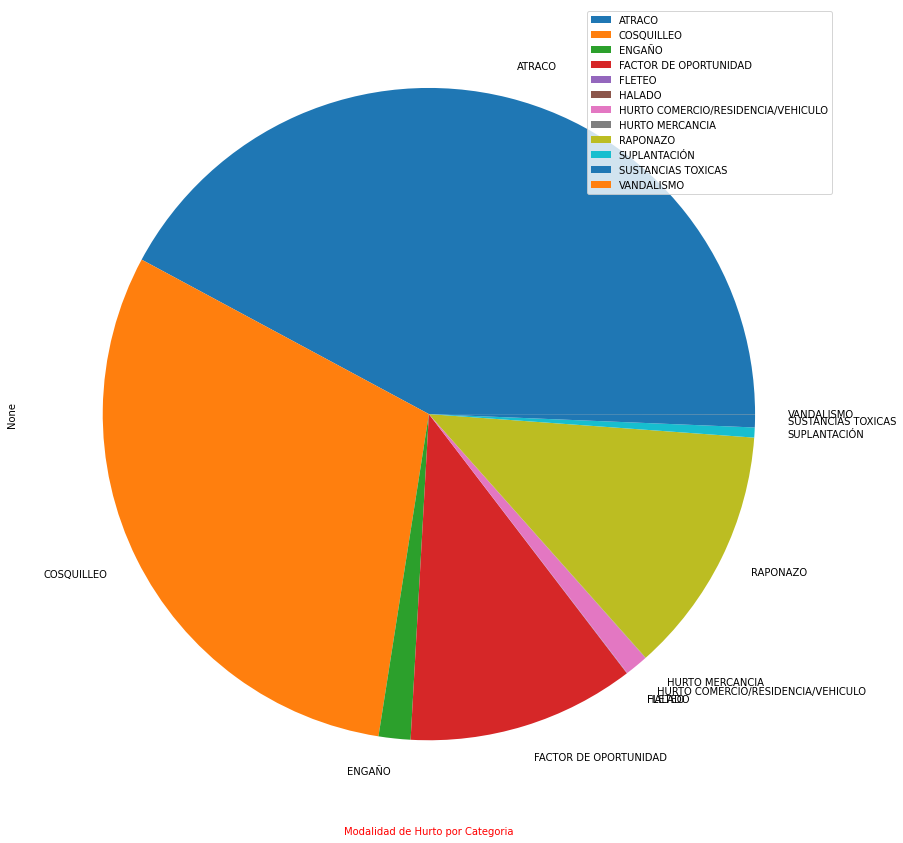

In [12]:
#Gráfico de la modalidad utilizada en el hurto
primaryVisualizeHU.plot.pie(figsize = (15,15))
plt.xlabel('Modalidad de Hurto por Categoria', fontsize=10, color = 'red')
plt.legend()

### **2. Preparación de los Datos**

#### 2.1. Selección de datos

In [13]:
#Creación de un nuevo conjunto de datos para la aplicación de los modelos
hurtos_n = hurtos

In [14]:
#Se realiza codificación del número de cuadrante de las variable Jurisdiccion Cuadrante por medio de labelEncoder
cuadranteJuris = labelEncoder.fit_transform(hurtos_n['JURIS.CUADRANTE'])
hurtos_n['JURIS.CUADRANTE'] = cuadranteJuris


In [15]:
#Uso PCA para combianar variables de longitud y latitud
LUGAR_HECHO = hurtos_n[['LATITUD','LONGITUD']]
pca = PCA(n_components=1,random_state=123)
loc = pca.fit_transform(LUGAR_HECHO)
hurtos_n['LUGAR_HECHO'] = loc

In [16]:
#Visualización de las variables código categoria modalidad y categoria modalidad con el fin de realizar un agrupamiento más concreto por la modalidad de hurto
print(hurtos_n[['COD_CAT_MODALIDAD', 'CATEGORIA_MODALIDAD']].head(10))

   COD_CAT_MODALIDAD    CATEGORIA_MODALIDAD
0                  1             COSQUILLEO
1                  2               RAPONAZO
2                  3  FACTOR DE OPORTUNIDAD
3                  4                 ATRACO
4                  4                 ATRACO
5                  3  FACTOR DE OPORTUNIDAD
6                  3  FACTOR DE OPORTUNIDAD
7                  3  FACTOR DE OPORTUNIDAD
8                  1             COSQUILLEO
9                  4                 ATRACO


In [17]:
#Agrupación en 4 modalidades de hurto para la optimización de los modelos

#Reemplazo de la modalidad engaño por cosquilleo
hurtos_n['CATEGORIA_MODALIDAD'] = hurtos_n['CATEGORIA_MODALIDAD'].replace(['ENGAÑO'],'COSQUILLEO')
#Reemplazo de la modalidad suplantacion por cosquilleo
hurtos_n['CATEGORIA_MODALIDAD'] = hurtos_n['CATEGORIA_MODALIDAD'].replace(['SUPLANTACIÓN'],'COSQUILLEO')
#Reemplazo de la modalidad halado por raponazo
hurtos_n['CATEGORIA_MODALIDAD'] = hurtos_n['CATEGORIA_MODALIDAD'].replace(['HALADO'],'RAPONAZO')
#Reemplazo de la modalidad sustacias toxicas por factor de oportunidad
hurtos_n['CATEGORIA_MODALIDAD'] = hurtos_n['CATEGORIA_MODALIDAD'].replace(['SUSTANCIAS TOXICAS'],'FACTOR DE OPORTUNIDAD')
#Reemplazo de la modalidad fleteo por factor de oportunidad
hurtos_n['CATEGORIA_MODALIDAD'] = hurtos_n['CATEGORIA_MODALIDAD'].replace(['FLETEO'],'FACTOR DE OPORTUNIDAD')
#Reemplazo de la modalidad HURTO COMERCIO/RESIDENCIA/VEHICULO por ATRACO
hurtos_n['CATEGORIA_MODALIDAD'] = hurtos_n['CATEGORIA_MODALIDAD'].replace(['HURTO COMERCIO/RESIDENCIA/VEHICULO'],'ATRACO')

In [18]:
#Agrupación en 4 modalidades de hurto para la optimización de los modelos

#Reemplazo de la modalidad VANDALISMO por ATRACO
hurtos_n['CATEGORIA_MODALIDAD'] = hurtos_n['CATEGORIA_MODALIDAD'].replace(['VANDALISMO'],'ATRACO')
#Reemplazo de la modalidad HURTO MERCANCIA por ATRACO
hurtos_n['CATEGORIA_MODALIDAD'] = hurtos_n['CATEGORIA_MODALIDAD'].replace(['HURTO MERCANCIA'],'ATRACO')


#Reemplazo en el codigo de categoria de engaño 5 por cosquilleo 1
hurtos_n['COD_CAT_MODALIDAD'] = hurtos_n['COD_CAT_MODALIDAD'].replace([5],1)
#Reemplazo en el codigo de categoria de suplantacion 6 por cosquilleo 1
hurtos_n['COD_CAT_MODALIDAD'] = hurtos_n['COD_CAT_MODALIDAD'].replace([6],1)
#Reemplazo en el codigo de categoria de halado 12 por raponazo 2
hurtos_n['COD_CAT_MODALIDAD'] = hurtos_n['COD_CAT_MODALIDAD'].replace([12],2)

#Reemplazo en el codigo de categoria de sustancias 9 por factor oportunidad 3
hurtos_n['COD_CAT_MODALIDAD'] = hurtos_n['COD_CAT_MODALIDAD'].replace([9],3)
#Reemplazo en el codigo de categoria de FLETEO 11 por factor oportunidad 3
hurtos_n['COD_CAT_MODALIDAD'] = hurtos_n['COD_CAT_MODALIDAD'].replace([11],3)

#Reemplazo en el codigo de categoria de HURTO COMERCIO/RESIDENCIA/VEHICULO 7 por ATRACO 4
hurtos_n['COD_CAT_MODALIDAD'] = hurtos_n['COD_CAT_MODALIDAD'].replace([7],4)

#Reemplazo en el codigo de categoria de VANDALISMO 8 por ATRACO 4
hurtos_n['COD_CAT_MODALIDAD'] = hurtos_n['COD_CAT_MODALIDAD'].replace([8],4)
#Reemplazo en el codigo de categoria de HURTO MERCANCIA 10 por ATRACO 4
hurtos_n['COD_CAT_MODALIDAD'] = hurtos_n['COD_CAT_MODALIDAD'].replace([10],4)

In [19]:
pd.set_option('max_columns', 47)
pd.set_option('max_rows', 100)
hurtos_n.tail(2)

,COD_JURIS_ESTACION,JURIS.ESTACIÓN / ÁREA,LOCALIDAD,COD_LOCALIDAD,JURIS.CAI,SIGLA_ESTACION,COD_COSEC_BOGOTA,COSEC_BOGOTA,JURIS.CUADRANTE,AÑO,MES_NUM,MES_LARGO,DIA_NUM,DIA_SEMANA,FECHA_HECHO,HORA_HECHO,FECHA_COMPLETA_1,FECHA_COMPLETA,COD_INTERVALOS_HORA,INTERVALOS_HORA,COD_CAT_MODALIDAD,CATEGORIA_MODALIDAD,COD_MOVIL_AGRESOR,MOVIL_AGRESOR,COD_MOVIL_VICTIMA,MOVIL_VICTIMA,COD_ARMAS_MEDIOS,ARMAS_MEDIOS,COD_ZONA,ZONA,COD_CAT_CLASE_SITIO,CATEGORIA_CLASE_SITIO,CLASE_SITIO,LATITUD,LONGITUD,HECHOS_ID,COD_MEDIO_CONOCIMIENTO,MEDIO_CONOCIMIENTO,COD_GENERO,GENERO,EDAD,COD_AGRUPA_EDAD_PERSONA,AGRUPA_EDAD_PERSONA,CANTIDAD,BARRIOS_HECHO,COD_BARRIO,LUGAR_HECHO
59546,522,ESTACION E-22 TERMINAL DE TRANSPORTE,FONTIBÓN,9,TERMINAL DE TRANSPORTE E-22,E - 22,5,COSEC ESP.,1051,2018,12,Diciembre,1,Domingo,2018-12-16,00:00:00,12/16/2018 12:00:00 a. m.,12/16/2018 12:00:00 a. m.,1,00:00 - 05:59,1,COSQUILLEO,1,A PIE,1,A PIE,1,SIN EMPLEO DE ARMAS,1,URBANA,17,TERMINAL DE TRANSPORTES,TERMINAL DE TRANSPORTES,4.654527,-74.114836,23877621,1,DENUNCIA VIRTUAL,2,MASCULINO,42,3,ADULTOS,1.0,TERMINAL MODULO ROJO,12527,-0.000276
59547,521,ESTACION E-21 AEROPUERTO,ENGATIVA,10,AEROPUERTO E-21,E - 21,5,COSEC ESP.,1051,2018,12,Diciembre,1,Domingo,2018-12-16,23:00:00,12/16/2018 11:00:00 p. m.,12/16/2018 11:00:00 p. m.,4,18:00 - 23:59,1,COSQUILLEO,1,A PIE,1,A PIE,1,SIN EMPLEO DE ARMAS,1,URBANA,1,AEROPUERTO,AEROPUERTO,4.694121,-74.138344,24662535,1,DENUNCIA VIRTUAL,2,MASCULINO,42,3,ADULTOS,1.0,AEROPUERTO EL DORADO,12048,0.025697


In [20]:
#visualizacion de la agrupación de los 4 modalidades de hurto 
primaryVisualizeHU = hurtos_n.groupby('CATEGORIA_MODALIDAD').size()
# CATEGORIA_MODALIDAD

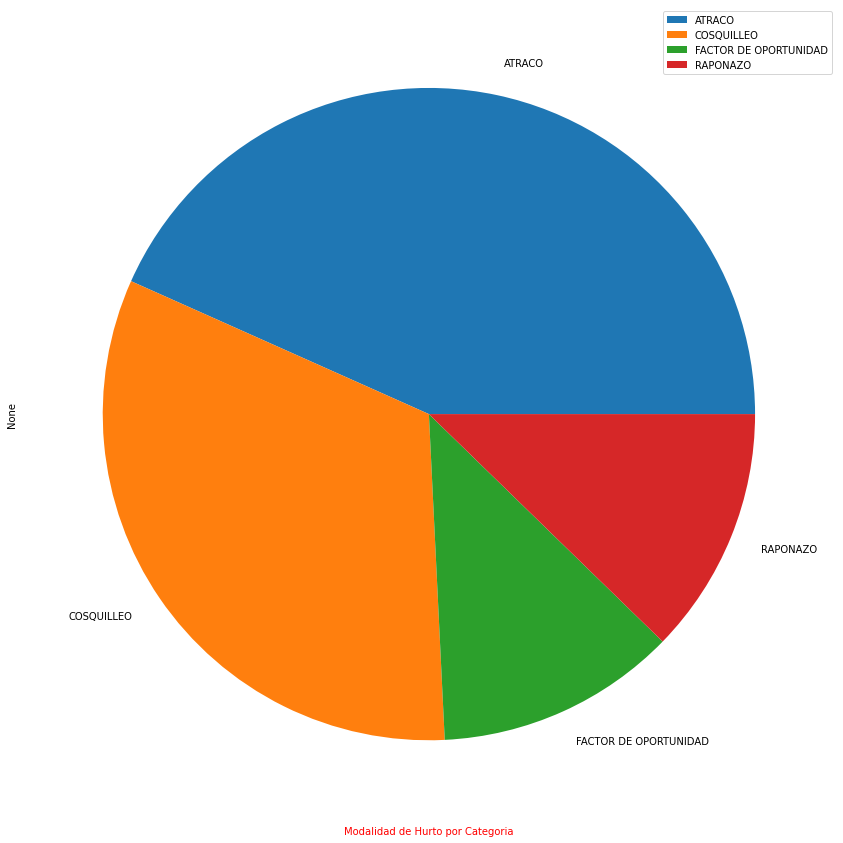

In [21]:
#Gráfico de la modalidad utilizada en el hurto en 4 categorias
primaryVisualizeHU.plot.pie(figsize = (15,15))
plt.xlabel('Modalidad de Hurto por Categoria', fontsize=10, color = 'red')
plt.legend()

In [22]:
hurtos_n['COD_LOCALIDAD'] = hurtos_n['COD_LOCALIDAD'].astype('object')
hurtos_n.dtypes

COD_JURIS_ESTACION                  int64
JURIS.ESTACIÓN / ÁREA              object
LOCALIDAD                          object
COD_LOCALIDAD                      object
JURIS.CAI                          object
SIGLA_ESTACION                     object
COD_COSEC_BOGOTA                    int64
COSEC_BOGOTA                       object
JURIS.CUADRANTE                     int64
AÑO                                 int64
MES_NUM                             int64
MES_LARGO                          object
DIA_NUM                             int64
DIA_SEMANA                         object
FECHA_HECHO                datetime64[ns]
HORA_HECHO                         object
FECHA_COMPLETA_1                   object
FECHA_COMPLETA                     object
COD_INTERVALOS_HORA                 int64
INTERVALOS_HORA                    object
COD_CAT_MODALIDAD                   int64
CATEGORIA_MODALIDAD                object
COD_MOVIL_AGRESOR                   int64
MOVIL_AGRESOR                     

#### 2.2. Construcción de los datos

In [23]:
#Selección de un nuevo dataset para la creación de los modelos
hurtos_p = hurtos_n

In [24]:
#Selección de variables para el modelo
hurtos_p = hurtos_p.drop(columns=['JURIS.ESTACIÓN / ÁREA',
        'JURIS.CAI', 'SIGLA_ESTACION','LOCALIDAD',
       'COSEC_BOGOTA',  'AÑO',  'MES_LARGO',
        'FECHA_HECHO', 'HORA_HECHO',
       'FECHA_COMPLETA_1', 'FECHA_COMPLETA', 'DIA_SEMANA','COD_INTERVALOS_HORA',
       'INTERVALOS_HORA',  'CATEGORIA_MODALIDAD','COD_CAT_CLASE_SITIO',
       'COD_MOVIL_AGRESOR', 'MOVIL_AGRESOR', 'COD_MOVIL_VICTIMA',
       'MOVIL_VICTIMA', 'COD_ARMAS_MEDIOS', 'ARMAS_MEDIOS', 'COD_ZONA', 'ZONA',
        'CATEGORIA_CLASE_SITIO', 'CLASE_SITIO',
       'HECHOS_ID',
       'MEDIO_CONOCIMIENTO',  'GENERO', 'EDAD',
       'COD_AGRUPA_EDAD_PERSONA', 'AGRUPA_EDAD_PERSONA', 'CANTIDAD',
       'BARRIOS_HECHO', ])

In [25]:
#Creación de variable dummie para la variable código de localidad
hurtos_p = pd.get_dummies(hurtos_p, columns=["COD_LOCALIDAD"])
hurtos_p

,COD_JURIS_ESTACION,COD_COSEC_BOGOTA,JURIS.CUADRANTE,MES_NUM,DIA_NUM,COD_CAT_MODALIDAD,LATITUD,LONGITUD,COD_MEDIO_CONOCIMIENTO,COD_GENERO,COD_BARRIO,LUGAR_HECHO,COD_LOCALIDAD_1,COD_LOCALIDAD_2,COD_LOCALIDAD_3,COD_LOCALIDAD_4,COD_LOCALIDAD_5,COD_LOCALIDAD_6,COD_LOCALIDAD_7,COD_LOCALIDAD_8,COD_LOCALIDAD_9,COD_LOCALIDAD_10,COD_LOCALIDAD_11,COD_LOCALIDAD_12,COD_LOCALIDAD_13,COD_LOCALIDAD_14,COD_LOCALIDAD_15,COD_LOCALIDAD_16,COD_LOCALIDAD_17,COD_LOCALIDAD_18,COD_LOCALIDAD_19
0,101,1,0,1,2,1,4.722211,-74.039124,1,1,10001,0.093040,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,101,1,0,1,5,2,4.720971,-74.038167,1,2,10001,0.092319,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,101,1,0,1,7,3,4.724730,-74.039229,1,1,10001,0.095279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,101,1,0,1,7,4,4.724785,-74.038308,1,2,10002,0.095718,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,101,1,0,1,1,4,4.725181,-74.036366,1,2,10001,0.096896,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59543,522,5,1051,12,6,1,4.652241,-74.113542,1,2,10207,-0.001802,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
59544,205,2,1051,12,1,4,4.518964,-74.114397,1,2,11045,-0.122988,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59545,521,5,1051,12,1,1,4.690047,-74.130978,1,2,12048,0.025112,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
59546,522,5,1051,12,1,1,4.654527,-74.114836,1,2,12527,-0.000276,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### **3. Modelado**

#### 3.1. Selección técnica de modelado
Para este trabajo de se utilizará diferentes __*modelos*__ con el fin de identificar que modelo es óptimo con relación al cojunto de datos.

# Modelo 1. K-Nearest Neighbor (KNN - Supervisado)

In [26]:
X = hurtos_p.drop(['COD_CAT_MODALIDAD'], axis = 1)
y = hurtos_p['COD_CAT_MODALIDAD']
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [27]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

Se construye el modelo KNN, con el fin de obtener el reporte de clasificación y la matriz de confusión las cuales permitirán evaluar que tan preciso es el modelo teniendo en cuenta las variables 
vecinos k (n-neighbors) para esta evaluación se escogerán 5, con el fin de obtener una evaluación preliminar.

In [28]:
#Creación y entrenamiento del Modelo KNN
# Crear la instancia KNN 
# n_neighbors -> identifica la cantidad de vecinos utilizados para la clasificación
knn = KNeighborsClassifier(n_neighbors=5)
# Fit (entrenamiento) del modelo
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
#Hacer predicciones
#Usamos el método .predict() para hace las predicciones para el subset X_test
prediccion = knn.predict(X_test)
# Vista de la predicciones
prediccion

array([1, 4, 1, ..., 2, 4, 1])

In [30]:
# Importar el módulo classification report y matriz de confusión para evaluar la predicción
from sklearn.metrics import classification_report, confusion_matrix

Evaluación del modelo mediante el reporte de clasificación y la matriz de confusión, donde se puede evaluar que tan preciso es el modelo con los datos de entrenamiento del modelo

In [31]:
# Visualización de classification report y matriz de confusión 
print(classification_report(y_test, prediccion))

              precision    recall  f1-score   support

           1       0.42      0.53      0.47      3918
           2       0.19      0.13      0.15      1466
           3       0.17      0.09      0.12      1468
           4       0.49      0.50      0.49      5058

    accuracy                           0.41     11910
   macro avg       0.32      0.31      0.31     11910
weighted avg       0.39      0.41      0.40     11910



### El modelo ejecutado indica en el Reporte de Clasificación una Exactitud (Accuracy) del 41% del modelo, logrando indicar lo siguiente:

1. En la recuperación (Recall) que indica cuantos de esta clase encuentras sobre el número total de elementos de esta clase, se podría explicar que se presenta un alto porcentaje de Recall en las categorías: No. 1. Cosquilleo con 53% y No. 4. Atraco con 50%, que presentan un mayor total de numero de elementos de esta clase.

2. Con relación a la Precisión (Precision) que indica cuantos están correctamente clasificados por esta clase, se puede visualizar que presentan un alto porcentaje de Precisión las categorías: No. 1. Cosquilleo con un 42%, No. 4. Atraco con un 49%. Porcentaje Bajo: No. 2. Raponazo con un 19%, No. 3. Factor de Oportunidad con un 17%, se concluye que las categorías de modalidades de hurto con mayor Precisión son el Cosquilleo y el Atraco.

3. En relación al F1-Score que es la media armónica entre la Precisión (Precision) y Recuperación (Recall), indica que las categorías con un alto porcentaje son: No.1 Cosquilleo con un 47% y No. 4. Atraco con un 59%. Con un porcentaje bajo No. 2 Raponazo con un 15% y No. 3 Factor de oportunidad con un 12%.

4. El soporte (Support) es el número de ocurrencias de la clase dada en el conjunto de datos, podemos concluir que la categoría de modalidad de hurto No. 1. Cosquilleo tiene un soporte de 5800, No. 4. Atraco tiene un soporte de 7710, No. 2. Raponazo con 2187 y 2168 para No. 3. Factor de oportunidad.

In [32]:
# Visualizacioón de la matrix de confusión
cmat = confusion_matrix(y_test, prediccion)

print('VN - Verdadero Negativo {}'.format(cmat[0,0]))
print('FP - Falso Positivo {}'.format(cmat[0,1]))
print('FN - Falso Negativo {}'.format(cmat[1,0]))
print('VP - Verdadero Positivo {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))
print('Diagonal Principal (VN - VP): {}'.format((np.sum([cmat[0,0],cmat[1,1]]))))
print('Diagonal Secundaria (FP - FN): {}'.format((np.sum([cmat[0,1],cmat[1,0]]))))

VN - Verdadero Negativo 2094
FP - Falso Positivo 248
FN - Falso Negativo 549
VP - Verdadero Positivo 186
Accuracy Rate: 0.19143576826196473
Misclassification Rate: 0.06691855583543241
Diagonal Principal (VN - VP): 2280
Diagonal Secundaria (FP - FN): 797


Con relación, a la matriz de confusión se puede indicar que los valores estimados de forma correcta por el modelos fueron de 3408, con relación a los valores estimados de forma no correcta fue de 1195, se puede concluir que el modelo de acuerdo a la exactitud (Accuracy) en la matriz de confusión representa el porcentaje de las predicciones correctas frente al total fue de 19%.

In [33]:
#Evaluar alternativas de K-values para mejores predicciones

error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Mínimo error: 0.5275398824517212 Mínimo K-Values = 36


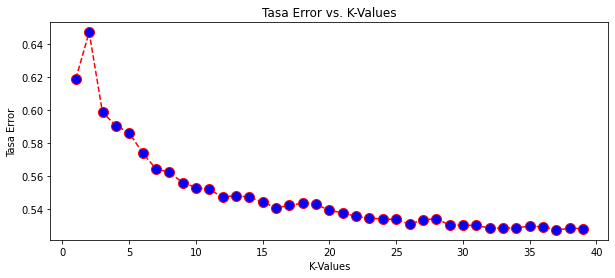

In [34]:
# Visualiazación de la tasa de error sobre k values
plt.figure(figsize=(10,4))
plt.plot(range(1,40), error_rate, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Tasa Error vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Tasa Error')
print("Mínimo error:",min(error_rate),"Mínimo K-Values =",error_rate.index(min(error_rate)))

Se evidencia que la tasa de error (error rate) disminuye a medida que aumentan el valor de K (k-values). El valor óptimo de K es de 18 y valor de K máxima de 38 con una tasa de error mínima del 52% para el máximo valor de K.

### Ajustar el modelo

In [35]:
#Evaluar alternativas de Accuracy y cantidad de Valor de K (K-values)
error_rate = []


for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(metrics.accuracy_score(y_test, pred_i))

Máximo Accuracy: 0.47246011754827877 Mínimo K-Values: 1 Máximo K-Values = 36


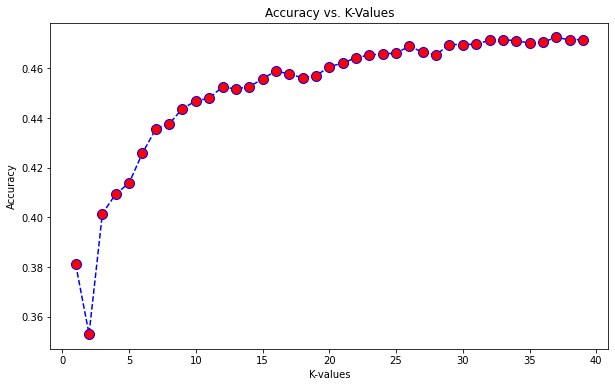

In [36]:
#Visualización del máximo de Accuracy y cantidad minima y máxima de K-values
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K-Values')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
print("Máximo Accuracy:",max(error_rate),"Mínimo K-Values:", error_rate.index(min(error_rate)), "Máximo K-Values =",error_rate.index(max(error_rate)))

El modelo ajustado presenta una exactitud (Accuracy) máxima del del 47% y los valores mínimos de K es de 1 y máximos de 36 permitiendo obtener una mejor eficiencia en el valor de K.

In [37]:
#Reentrenamos el modelo usando los valores de k (k-values = 16) 
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
prediccion1 = knn.predict(X_test)

In [38]:
#Visualización del reporte de clasificación con los valores de k ajustados (classification report)
print(classification_report(y_test, prediccion1))

              precision    recall  f1-score   support

           1       0.44      0.51      0.47      3918
           2       0.27      0.06      0.10      1466
           3       0.19      0.02      0.04      1468
           4       0.49      0.66      0.56      5058

    accuracy                           0.46     11910
   macro avg       0.35      0.31      0.29     11910
weighted avg       0.41      0.46      0.41     11910



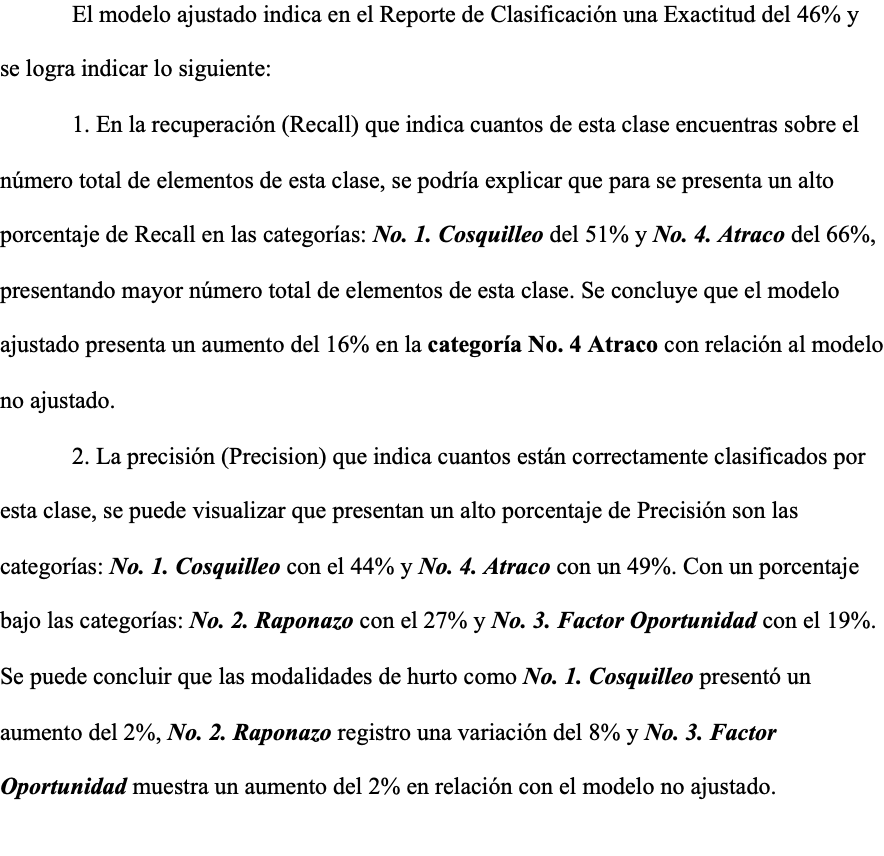

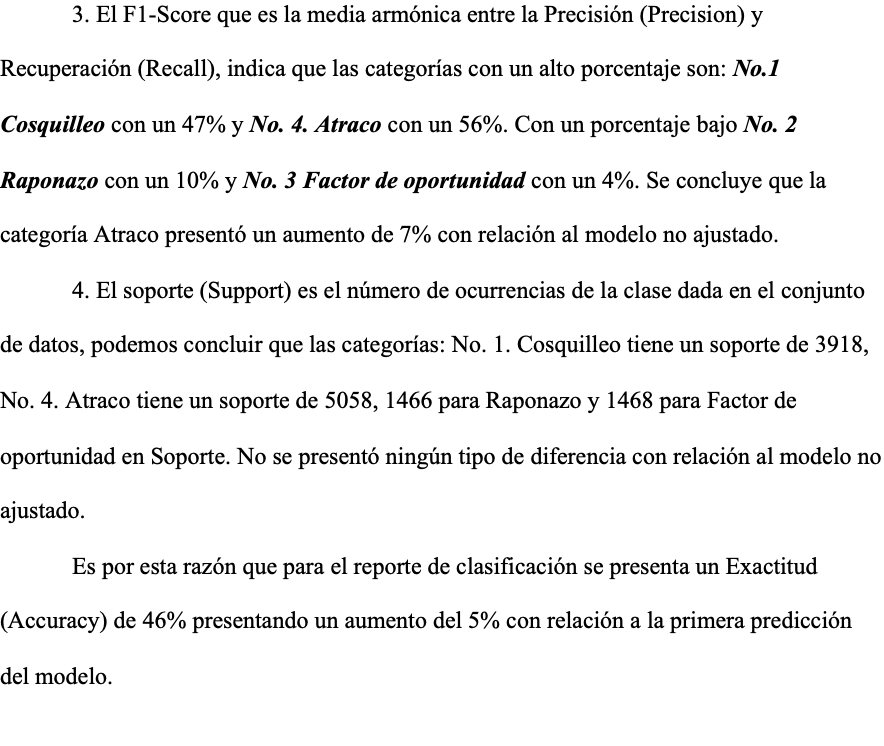

In [39]:
# Visualizacioón de la matrix de confusión ajustada
cmat = confusion_matrix(y_test, prediccion1)

print('VN - Verdadero Negativo {}'.format(cmat[0,0]))
print('FP - Falso Positivo {}'.format(cmat[0,1]))
print('FN - Falso Negativo {}'.format(cmat[1,0]))
print('VP - Verdadero Positivo {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))
print('Diagonal Principal (VN - VP): {}'.format((np.sum([cmat[0,0],cmat[1,1]]))))
print('Diagonal Secundaria (FP - FN): {}'.format((np.sum([cmat[0,1],cmat[1,0]]))))



VN - Verdadero Negativo 1999
FP - Falso Positivo 77
FN - Falso Negativo 520
VP - Verdadero Positivo 94
Accuracy Rate: 0.17573467674223342
Misclassification Rate: 0.050125944584382874
Diagonal Principal (VN - VP): 2093
Diagonal Secundaria (FP - FN): 597


Y con relación a la matriz de confusión se puede indicar que los valores estimados de forma correcta por el modelos fue de 3117, y con relación a los valores estimados de forma no correcta fue de 875. El modelo de acuerdo a la exactitud (Accuracy) que representa el porcentaje de las predicciones correctas frente al total fue de 17% en la matriz de confusión, indicando que para el modelo el conjunto de datos es poco equilibrado lo cual no indica una métrica lo suficientemente buena para considerarse dentro del modelo.


# Modelo 2. Random Forest Classifier 

In [40]:
X = hurtos_p.drop(['COD_CAT_MODALIDAD'], axis = 1)
y = hurtos_p['COD_CAT_MODALIDAD']
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [41]:
from sklearn.model_selection import train_test_split
X_trainrf, X_testrf, y_trainrf, y_testrf = train_test_split( X, y, test_size=0.2, random_state=4)

In [42]:
rfc = RandomForestClassifier(random_state=0)

# fit del modelo
rfc.fit(X_trainrf, y_trainrf)

# Predicción de los resultados de los datos de test
y_pred = rfc.predict(X_testrf)

# Resultados de la exactitud (accuracy)
print('Resultado de la exactitud (accuracy) del modelo: {0:0.4f}'. format(accuracy_score(y_testrf, y_pred)))



Resultado de la exactitud (accuracy) del modelo: 0.4868


In [43]:
#Calculo del modelo con 100 estimadores
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit del modelo
rfc_100.fit(X_trainrf, y_trainrf)

# Predicción de los resultados de los datos de test
y_pred_100 = rfc_100.predict(X_testrf)

# Resultados de la exactitud (accuracy)

print('Resultado de la exactitud (accuracy) del modelo con 100 estimadores : {0:0.4f}'. format(accuracy_score(y_testrf, y_pred_100)))

Resultado de la exactitud (accuracy) del modelo con 100 estimadores : 0.4868


In [44]:
#Aplicación del modelo con 100 estimadores
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit del modelo
clf.fit(X_trainrf, y_trainrf)

RandomForestClassifier(random_state=0)

In [47]:
#Matriz de confusión del Random Forests
cm_rf = confusion_matrix(y_testrf, y_pred)

print('Matriz de Confusión\n\n', cm_rf)

Matriz de Confusión

 [[2075  103  130 1610]
 [ 374  110   50  932]
 [ 442   59   95  872]
 [1169  224  147 3518]]


In [46]:
# Reporte de clasificación del modelo random Forests
print(classification_report(y_testrf, y_pred))

              precision    recall  f1-score   support

           1       0.51      0.53      0.52      3918
           2       0.22      0.08      0.11      1466
           3       0.23      0.06      0.10      1468
           4       0.51      0.70      0.59      5058

    accuracy                           0.49     11910
   macro avg       0.37      0.34      0.33     11910
weighted avg       0.44      0.49      0.45     11910



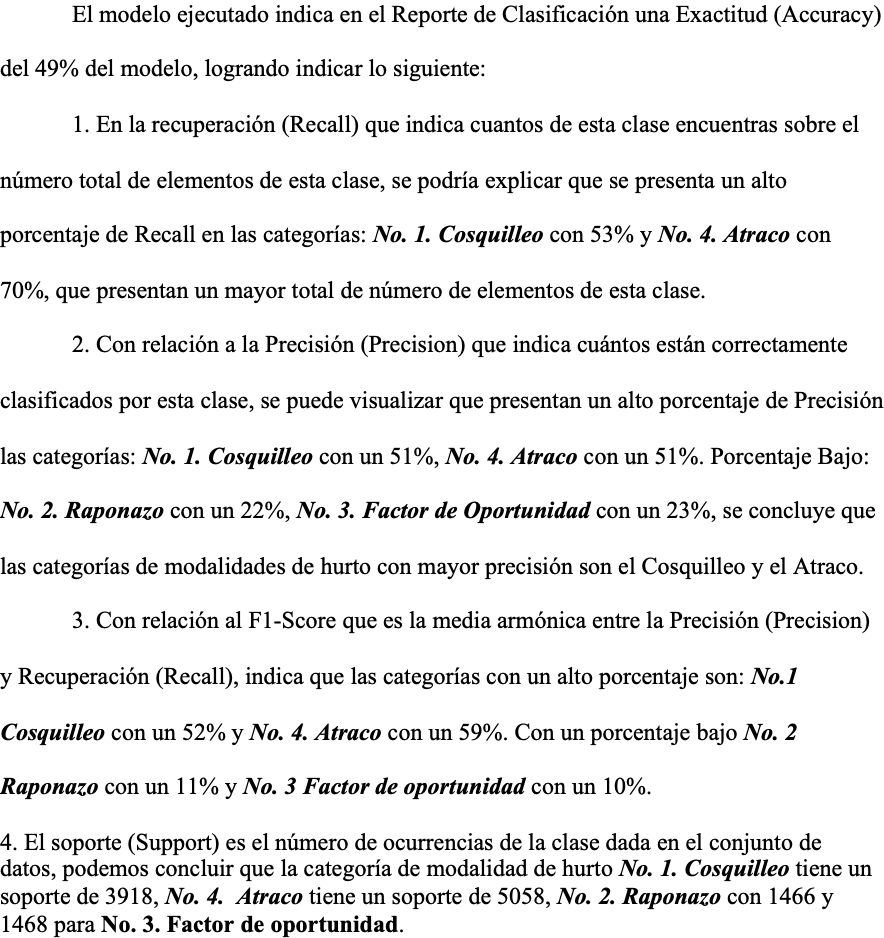

# Modelo 3. Clasificación y Predicción de Puntos Calientes (Hot Spots) 


En esta sección se pretende realizar un análisis de clasificación de puntos calientes (Hot spots) mediante el uso de variables específicas, de la misma manera se realizó una predicción de puntos calientes (Hot spots) mediante la la creación de una variable denominada Alerta donde se clasificó la alerta de la siguiente manera: baja, media y alta. Lo anterior, mediante la implementación de modelos como Arboles de Decisión y Random Forests. 

In [49]:
hurtos_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59548 entries, 0 to 59547
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   COD_JURIS_ESTACION       59548 non-null  int64         
 1   JURIS.ESTACIÓN / ÁREA    59548 non-null  object        
 2   LOCALIDAD                59548 non-null  object        
 3   COD_LOCALIDAD            59548 non-null  object        
 4   JURIS.CAI                59548 non-null  object        
 5   SIGLA_ESTACION           59548 non-null  object        
 6   COD_COSEC_BOGOTA         59548 non-null  int64         
 7   COSEC_BOGOTA             59548 non-null  object        
 8   JURIS.CUADRANTE          59548 non-null  int64         
 9   AÑO                      59548 non-null  int64         
 10  MES_NUM                  59548 non-null  int64         
 11  MES_LARGO                59548 non-null  object        
 12  DIA_NUM                  59548 n

In [50]:
#Mapa de calor de la ciudad de Bogotá de acuerdo a sus coordenadas, visualizando la intensidad de datos del conjunto de datos 

LATITUD = 4.60971
LONGITUD = -74.08175


BogotaMapa = folium.Map(location=[LATITUD, LONGITUD], 
                 tiles = "OpenStreetMap",
                zoom_start=12)
hotspot = hurtos_n.head(50000)
heat_data = [[row['LATITUD'],row['LONGITUD']] for index, row in hotspot.iterrows()]
HeatMap(heat_data, radius=10).add_to(BogotaMapa)

BogotaMapa

Ingrese la sigla del COSEC para visualizar la concentración de hurto de celulares (Ej. COSEC 1) >> COSEC 1


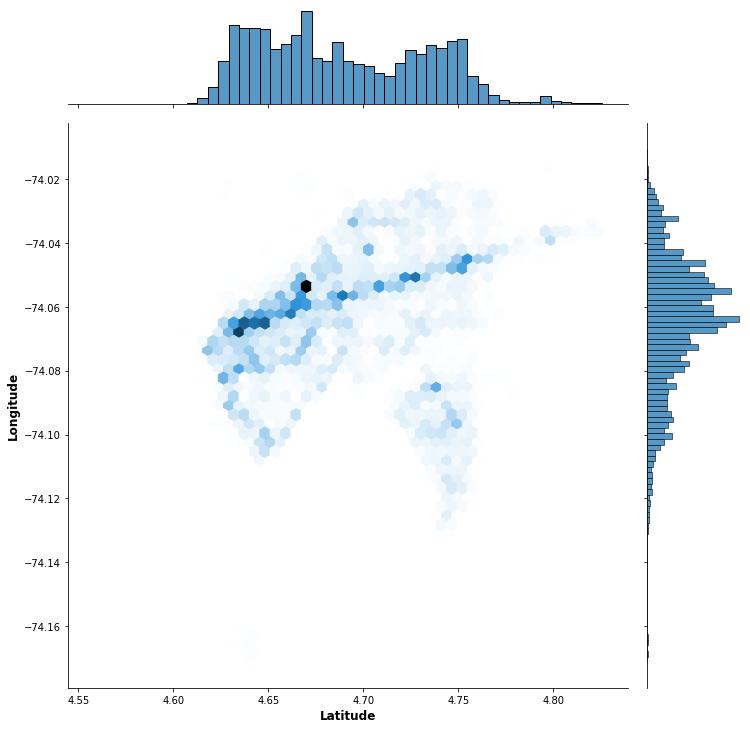

In [51]:
# Selección de los Comandos Operativos con el fin de ser visualizados de acuerdo a la cantidad de hurtos cometidos en el mismo
c = input("Ingrese la sigla del COSEC para visualizar la concentración de hurto de celulares (Ej. COSEC 1) >> ")
crime_df = hurtos[hurtos['COSEC_BOGOTA']==c.upper()]

sns.jointplot(x=crime_df['LATITUD'].values, y=crime_df['LONGITUD'].values, height=10, kind='hex')

plt.xlabel("Latitude", fontdict={'fontsize': 12}, weight='bold')
plt.ylabel("Longitude", fontdict={'fontsize': 12}, weight="bold")
plt.show()

Con relación a la clasificación de puntos calientes es necesario obtener una visualización preliminar de la concentración del hurto en los Comandos Operativos de Seguridad Ciudadana, mediante mapas de calor de cada uno de ellos

## Clasificación de la Modalidad del Hurto

In [52]:
# Cantidad de hurtos por la modalidad de hurto ordenados de orden ascendente
cm_hurtos = hurtos['CATEGORIA_MODALIDAD'].value_counts().sort_values(ascending=False).head()
print(cm_hurtos)

ATRACO                   25796
COSQUILLEO               19326
RAPONAZO                  7314
FACTOR DE OPORTUNIDAD     7112
Name: CATEGORIA_MODALIDAD, dtype: int64


In [53]:
#Selección de las variables objetivos y caracteristicas
X = hurtos[['JURIS.CUADRANTE','COD_BARRIO','LATITUD','LONGITUD','COD_COSEC_BOGOTA', 'COD_JURIS_ESTACION','COD_INTERVALOS_HORA']]
y = hurtos['COD_CAT_MODALIDAD']

In [54]:
X = X.fillna(0)
feature_names = list(X)
target_names = list(y)

In [55]:
# División de los datos en el conjunto de entrenamiento y pruebas

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [56]:
#Con el modulo OneVsRestClassifier se realizara una clasificacion multiclase, con el fin de ajustar un clasificador por clase.
clf = OneVsRestClassifier(AdaBoostClassifier())
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=AdaBoostClassifier())

In [57]:
results = cross_val_score(clf, X, y, cv=3)

In [58]:
#Resultado de la Exactitud del clasificador multiclase 
print(("Exactitud (Accuracy): %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0))

Exactitud (Accuracy): 36.085% (5.114%)


# Clasificacion de los Puntos Calientes 

In [76]:
#Selección de variables con el fin de obtener los puntos calientes.
cols= ['BARRIOS_HECHO','JURIS.ESTACIÓN / ÁREA', 'LOCALIDAD','COD_BARRIO', 'COD_CAT_MODALIDAD','COD_CAT_CLASE_SITIO', 'COD_JURIS_ESTACION', 'COD_INTERVALOS_HORA','MES_NUM','DIA_NUM']
new_df = hurtos[cols]
new_df.head(2)

,BARRIOS_HECHO,JURIS.ESTACIÓN / ÁREA,LOCALIDAD,COD_BARRIO,COD_CAT_MODALIDAD,COD_CAT_CLASE_SITIO,COD_JURIS_ESTACION,COD_INTERVALOS_HORA,MES_NUM,DIA_NUM
0,LOS CEDRITOS E-1,ESTACION E-01 USAQUEN,USAQUEN,10001,1,15,101,2,1,2
1,LOS CEDRITOS E-1,ESTACION E-01 USAQUEN,USAQUEN,10001,2,20,101,4,1,5


In [78]:
#Agrupación de algunas variables para el analisis
cri = new_df.groupby(['LOCALIDAD','MES_NUM'], as_index=False).agg({"COD_CAT_MODALIDAD":"count"})
cri = cri.sort_values(by=['COD_CAT_MODALIDAD','MES_NUM'], ascending=False)

cri2 = new_df.groupby(['LOCALIDAD','DIA_NUM'], as_index=False).agg({"COD_CAT_MODALIDAD":"count"})
cri2 = cri2.sort_values(by=['COD_CAT_MODALIDAD','DIA_NUM'], ascending=False)

In [79]:
cri = cri.head(200)
cri = cri.pivot("LOCALIDAD", "MES_NUM", "COD_CAT_MODALIDAD")

cri2 = cri2.head(100)
cri2 = cri2.pivot("LOCALIDAD", "DIA_NUM", "COD_CAT_MODALIDAD")

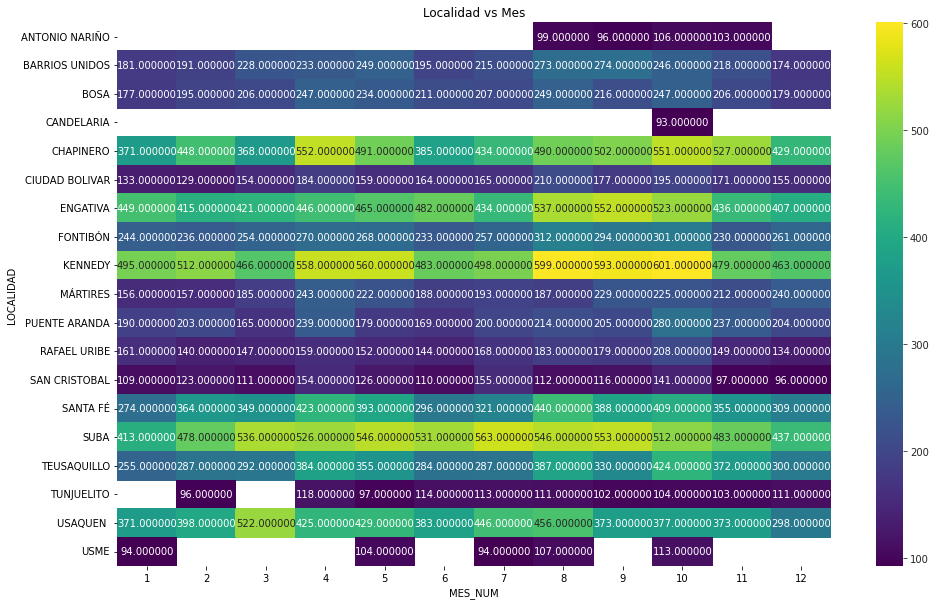

In [62]:
# Visualización de los puntos calientes por Localidad y Número de mes
plt.figure(figsize = (16,10))
plt.title("Localidad vs Mes")
with sns.axes_style("white"):
    sns.heatmap(cri, mask=cri.isnull(), cmap="viridis",annot=True,fmt="f")

### En este primer agrupamiento de variables según la gráfica anterior, permite visualizar como se concentró el hurto a celulares durante los meses del año 2018 en las localidades de la ciudad de Bogotá, mediante gráfica de calor donde se hace necesario indicar que el color verde amarillo hace relación a la mayor concentración de hurtos, evidenciando lo siguiente:  
1. La localidad de Kennedy presenta la mayor intensidad en la concentración del hurto con un promedio de 600 hurtos, registrados en los meses de agosto hasta octubre. 
2. En la Localidad de Suba registró una intensidad en el hurto promedio de 550, registrados de manera continua durante los meses de marzo hasta octubre.
3. Con relación a la localidad de Engativá presento alta intensidad con un promedio de 500 hurtos en los meses de agosto hasta octubre, pero así mismo, en esta localidad presento un concentración en el delito de un promedio de 400 hurtos de manera continua en los meses de enero hasta julio. 
4. Es necesario resaltar que localidades como Mártires, Puente Aranda, Rafael Uribe, San Cristóbal, Tunjuelito y Usme, la concentración del hurto presenta un promedio general durante los meses del año alrededor de los 200 hurtos, considerando que se presenta criminalidad baja de este flagelo, a diferencia a localidades como Kennedy, Suba y Engativá que registran un alto comportamiento en este delito. 

#### El segundo agrupamiento de variables, se visualiza el comportamiento del hurto en  las localidades y los días de la semana, se indica que el valor “0” corresponde al día domingo

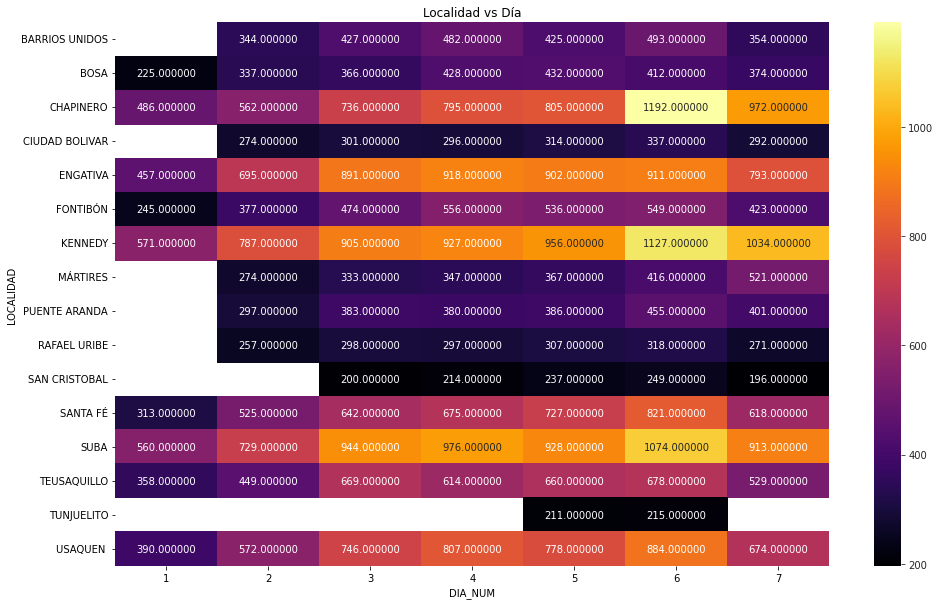

In [80]:
# Visualización de los puntos calientes por Localidad y dia
plt.figure(figsize = (16,10))
plt.title("Localidad vs Día")
with sns.axes_style("white"):
    sns.heatmap(cri2, mask=cri2.isnull(), cmap="inferno",annot=True,fmt="f")

#### se puede evidenciar lo siguiente: 
1. Las localidades de Chapinero, Kennedy y Suba presentan una mayor intensidad en el comportamiento del hurto a celulares, mostrando un promedio de 1000 hurtos durante los sábados. 
2. Para las localidades de Engativá, Kennedy, Suba, presentan una intensidad promedio de 900 hurtos durante los días de lunes hasta el viernes.  
3. Referente a las localidades de Santa Fe, Teusaquillo y Usaquén se presentan un promedio de 500 hurtos durante los días martes y viernes. 
4. Las localidades de Rafael Uribe, San Cristóbal y Ciudad Bolívar presentan un promedio 220 hurtos de lunes hasta el sábado.  
5. En las localidades de Barrios Unidos, Bosa y Fontibón se presentan un promedio de 450 hurtos los lunes, miércoles y jueves. 

#### Se realiza una última agrupación con relación al comportamiento presentado en la jurisdicción policial, para esta agrupación referente a las Estaciones de Policía de la ciudad de Bogotá y el número de mes

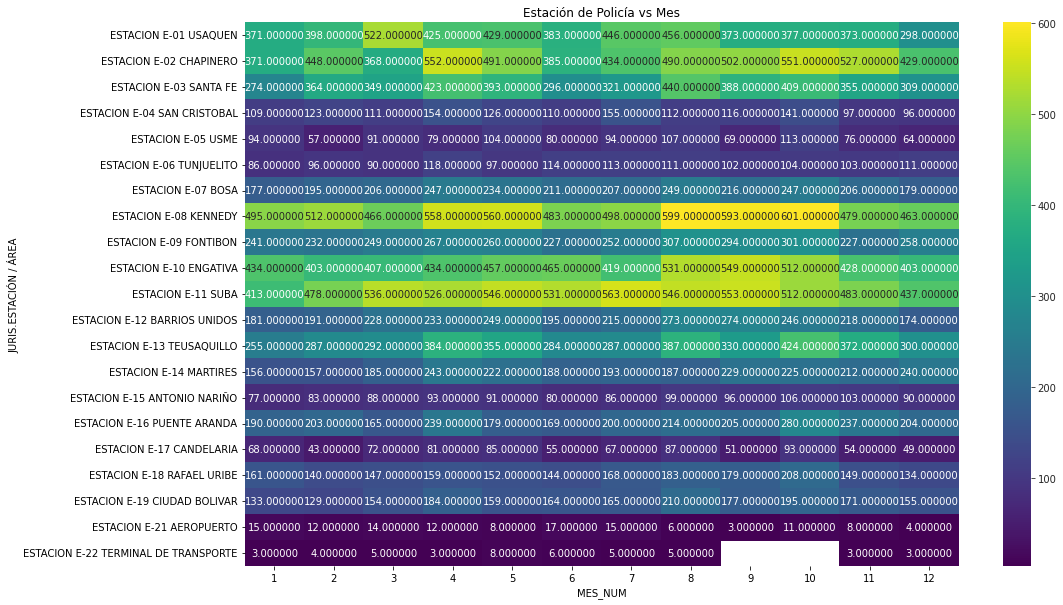

In [81]:
# Visualización de los hurtos cometidos en las Jurisdicciones policiales Estaciones de Policía
cri3 = new_df.groupby(['JURIS.ESTACIÓN / ÁREA','MES_NUM'],as_index=False).agg({'COD_CAT_MODALIDAD':"count"})
cri3.columns

cri3 = cri3.pivot('JURIS.ESTACIÓN / ÁREA', "MES_NUM", "COD_CAT_MODALIDAD")
plt.figure(figsize = (16,10))
plt.title("Estación de Policía vs Mes")
with sns.axes_style("white"):
    sns.heatmap(cri3, mask=cri3.isnull(), cmap="viridis", annot=True, fmt="f")

#### Para las Estaciones de Policía, se puede visualizar como ha sido la concentración del delito durante los meses del año, es necesario resaltar que el color verde amarillo registra valores mayores a 600 hurtos, evidenciando lo siguiente: 
1. En las estaciones de Policía: E11 - Suba, E2 - Chapinero, E-10 Engativá, E8 - Kennedy registran promedio alto de hurto durante los meses marzo, abril, mayo, agosto, septiembre y octubre con 550 hurtos registrados.  
2. Durante los meses del año las estaciones de policía que registran un promedio de casi 100 hurtos son: E4 – San Cristóbal, E-5 Usme, E-6 Tunjuelito, E-15 Antonio Nariño, E-17 Candelaria, E-21 Aeropuerto y E-22 Terminal de Transporte.  
3. Con relación a la concentración del delito durante los meses del año entre los 100 a 200 hurtos se presentaron en las siguientes estaciones de Policía: E-7 Bora, E-9 Fontibón, E-12 Barrios Unidos, E-13 Teusaquillo, E-14 Mártires, E-16 Puente Aranda, E-18 Rafael Uribe y E-19 Ciudad Bolívar.  

### Predicción del delito mediante puntos calientes (Hot spots)

In [82]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59548 entries, 0 to 59547
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   BARRIOS_HECHO          59548 non-null  object
 1   JURIS.ESTACIÓN / ÁREA  59548 non-null  object
 2   LOCALIDAD              59548 non-null  object
 3   COD_BARRIO             59548 non-null  int64 
 4   COD_CAT_MODALIDAD      59548 non-null  int64 
 5   COD_CAT_CLASE_SITIO    59548 non-null  int64 
 6   COD_JURIS_ESTACION     59548 non-null  int64 
 7   COD_INTERVALOS_HORA    59548 non-null  int64 
 8   MES_NUM                59548 non-null  int64 
 9   DIA_NUM                59548 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 4.5+ MB


In [83]:
# Creación de un nuevo conjunto de datos
cri4 = new_df.groupby(['MES_NUM','DIA_NUM','COD_JURIS_ESTACION','COD_INTERVALOS_HORA'], as_index=False).agg({"COD_CAT_MODALIDAD":"count"})
cri4 = cri4.sort_values(by=['COD_JURIS_ESTACION'], ascending=False)
cri4.head()

,MES_NUM,DIA_NUM,COD_JURIS_ESTACION,COD_INTERVALOS_HORA,COD_CAT_MODALIDAD
2438,5,4,522,2,2
3585,7,5,522,3,1
1064,2,7,522,4,1
148,1,2,522,1,1
2280,5,2,522,4,1


In [84]:
cri4 = cri4[['MES_NUM','DIA_NUM','COD_JURIS_ESTACION','COD_INTERVALOS_HORA','COD_CAT_MODALIDAD']]
cri4.head()
cri4.shape

(6324, 5)

In [85]:
print("Promedio de hurtos por mes y por día por Estación de Policía :",cri4['COD_CAT_MODALIDAD'].sum()/6324,".")

Promedio de hurtos por mes y por día por Estación de Policía : 9.416192283364959 .


In [86]:
# Función para crear cálculo de alerta 
def crime_rate_assign(x):
    if(x<=5): # Bajo
        return 0
    elif(x>6 and x<=15): #Medio
        return 1
    else:
        return 2
cri4['ALERTA'] = cri4['COD_CAT_MODALIDAD'].apply(crime_rate_assign)
cri4 = cri4[['MES_NUM','DIA_NUM','COD_JURIS_ESTACION','COD_INTERVALOS_HORA','COD_CAT_MODALIDAD','ALERTA']]
cri4.head()

,MES_NUM,DIA_NUM,COD_JURIS_ESTACION,COD_INTERVALOS_HORA,COD_CAT_MODALIDAD,ALERTA
2438,5,4,522,2,2,0
3585,7,5,522,3,1,0
1064,2,7,522,4,1,0
148,1,2,522,1,1,0
2280,5,2,522,4,1,0


Seleccionamos la variable COD_CAT_MODALIDAD para convertirla en la nueva variable ALERTA, en la cual mediante una función se realizó el calculo de la cantidad de alertas según su categoría Bajo (0 A 5 hurtos), Medio (6 a 15 hurtos) y Alto (Mayor 16). 

### Modelo Arboles de Decisión

In [87]:
# Selección de las variables para la realización del modelo
X = cri4[['MES_NUM','DIA_NUM','COD_JURIS_ESTACION','COD_INTERVALOS_HORA']] # Variables independientes
y = cri4['ALERTA'] # Variable Dependiente

In [88]:
# División de los datos en el conjunto de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 

In [89]:
# Creación del arbol
d_tree = DecisionTreeClassifier(random_state=10)
# Fit Arbol
d_tree = d_tree.fit(X_train, y_train)
# Predicción
y_pred = d_tree.predict(X_test)

# Evaluación del Modelo 
print("Exactitud (Accuracy):",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Matriz de Confusión para evaluar el Modelo
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarma'], colnames=['Predicción Alarma'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Reporte de Clasificación
print("\n----------Reporte de Clasificación------------------------------------")
print(classification_report(y_test,y_pred))

# Promedio no ponderado
print("\nPromedio No ponderado ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

Exactitud (Accuracy): 58.82352941176471 


----------Confusion Matrix------------------------------------
Predicción Alarma    0    1    2
Actual Alarma                   
0                  450  142   73
1                  112  266  152
2                   59  113  214

----------Reporte de Clasificación------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       665
           1       0.51      0.50      0.51       530
           2       0.49      0.55      0.52       386

    accuracy                           0.59      1581
   macro avg       0.57      0.58      0.57      1581
weighted avg       0.59      0.59      0.59      1581


Promedio No ponderado -> 0.5776608889512862


### De acuerdo a lo obtenido en el modelo de Arboles de Decisión, presenta una Exactitud (Accuracy) del 59%, y teniendo en cuenta la variable dependiente ALERTA se evidencia lo siguiente: 

El modelo indica en el Reporte de Clasificación una Exactitud del 59% y se logró evidenciar lo siguiente:
1. En la recuperación (Recall) que indica cuantos de esta clase encuentras sobre el número total de elementos de esta clase, se podría explicar que para se presenta un alto porcentaje de Recall en la clasificación de las alertas así: 0. Bajo del 68%, y 1. Medio del 50% y  2. Alto del 55%. Indicando que para las alertas de clasificación Bajo presentan un total mayor de números de elementos de esta clase. 
2. Con relación a la Precisión (Precision) que indica cuantos están correctamente clasificados por esta clase, se puede visualizar que presentan un alto porcentaje de Precisión las categorías de las alertas así: 0. Bajo con un 72%, 2. Alto con un 51% y 1. Medio con un 49%,  se concluye que las categorías de alertas con mayor Precisión son Bajo y Alto.
3. En relación al F1-Score que es la media armónica entre la Precisión (Precision) y Recuperación (Recall), indica que las categorías de alerta con un alto porcentaje son: 0. Bajo del 70%, y 1. Medio del 51% y  2. Alto del 52%.
4. El soporte (Support) es el número de ocurrencias de la clase dada en el conjunto de datos, podemos concluir que la categoría de alertas 0. Bajo  tiene un soporte de 665, 1.  Medio tiene un soporte de 530 y 2. Alto  con 386.

Con relación, a la matriz de confusión se puede indicar que los valores estimados de forma correcta por el modelos fueron de 944.

Categorias de la Alerta :

1. 0 : Bajo
2. 1 : Medio
3. 2 : Alto

### Modelo Random Forest para Clasificación

In [90]:
X = cri4.iloc[:,0:4].values #Selección de las variables Numero de mes, Dia de la semana, Código Jurisdicción Estación e Intervalos de Hora
y = cri4.iloc[:,5].values #Variable Dependiente (Alerta)

In [91]:
# División de los datos en el conjunto de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

In [92]:
#Creación del Modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 10)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Exactitud (Accuracy):",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

#Matriz de confusión
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarma'], colnames=['Predicción Alarma'])
print("\n----------Matriz de Confusión------------------------------------")
print(cm)

# Reporte de Clasificación
print("\n----------Reporte de Clasificación------------------------------------")
print(classification_report(y_test,y_pred))

# Promedio no ponderado
print("\nPromedio no ponderado ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)

Exactitud (Accuracy): 64.89563567362428 


----------Matriz de Confusión------------------------------------
Predicción Alarma    0    1    2
Actual Alarma                   
0                  536  108   24
1                  126  303  115
2                   58  124  187

----------Reporte de Clasificación------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       668
           1       0.57      0.56      0.56       544
           2       0.57      0.51      0.54       369

    accuracy                           0.65      1581
   macro avg       0.63      0.62      0.62      1581
weighted avg       0.64      0.65      0.65      1581


Promedio no ponderado -> 0.622051857149721


### De acuerdo a lo obtenido en el modelo de Random Forests Classifier según la figura xx, presenta una Exactitud (Accuracy) del 65%, y teniendo en cuenta la variable dependiente ALERTA evidenciando lo siguiente: 
El modelo en el Reporte de Clasificación presenta una Exactitud del 65% se indica lo siguiente:
1. En la recuperación (Recall) que indica cuantos de esta clase encuentras sobre el número total de elementos de esta clase, se podría explicar que para se presenta un alto porcentaje de Recall en la clasificación de las alertas así: 0. Bajo del 80%, y 1. Medio del 56% y  2. Alto del 53%. Indicando que para las alertas de clasificación Bajo presentan un total mayor de números de elementos de esta clase. 
2. Con relación a la Precisión (Precision) que indica cuantos están correctamente clasificados por esta clase, se puede visualizar que presentan un alto porcentaje de Precisión las categorías de las alertas así: 0. Bajo con un 74%, 2. Alto con un 61% y 1. Medio con un 57%,  se concluye que las categorías de alertas con mayor Precisión son Bajo y Alto.
3. En relación al F1-Score que es la media armónica entre la Precisión (Precision) y Recuperación (Recall), indica que las categorías de alerta con un alto porcentaje son: 0. Bajo del 77%, y 1. Medio del 57% y  2. Alto del 57%.
4. El soporte (Support) es el número de ocurrencias de la clase dada en el conjunto de datos, podemos concluir que la categoría de alertas 0. Bajo  tiene un soporte de 647, 1.  Medio tiene un soporte de 548 y 2. Alto  con 386. 


Con relación, a la matriz de confusión se puede indicar que los valores estimados de forma correcta por el modelos fueron de 1033.


Se puede concluir con la aplicación de los dos modelos Arboles de Decisión (AD) y Random Forests Classifier (RFC), teniendo en cuenta los resultados presentados en relación a la Exactitud, Matriz de Confusión y Reporte de Clasificación, el modelo más óptimo teniendo sus resultados, el modelo a tener en cuenta seria Random Forests Classifier, ya que presento una Exactitud del 65% a diferencia del Árbol de Decisión que presento un 59%, con relación a la Exactitud del Reporte de Clasificación Random Forests presenta un 65% y en el Árbol de Decisión presenta un 60%, y de acuerdo a la matriz de confusión RFC presento 1033 valores estimados de manera correcta y AD solo presento 944 valores estimados de manera correcta. 